In [2]:
# Importing dependencies
import pandas as pd
import hvplot.pandas
# from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [3]:
# Load the crypto_data.csv dataset.
file_path=("healthcare-dataset-stroke-data.csv")
stroke_df=pd.read_csv(file_path)
print(stroke_df.shape)
stroke_df.head(10)

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
# Remove "ID" column
stroke_all_df= stroke_df.drop("id",axis=1)
stroke_all_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Rename Column Names
column =["Gender","Age","Hypertension","Heart_Disease","Ever_Married","Work_Type","Residence_Type","Average_Glucoce","BMI","Smoking_Status","Stroke"]
stroke_all_df.columns=column
stroke_all_df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Average_Glucoce,BMI,Smoking_Status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Look for NAN
stroke_all_df.isnull().values.sum()

201

In [7]:
# Drop BMI NAN values from stroke_all_df
stroke_df = stroke_all_df.dropna()

In [8]:
# NAN count in the new dataframe stroke_df
stroke_df[column].isnull().sum()

Gender             0
Age                0
Hypertension       0
Heart_Disease      0
Ever_Married       0
Work_Type          0
Residence_Type     0
Average_Glucoce    0
BMI                0
Smoking_Status     0
Stroke             0
dtype: int64

In [9]:
# Shape of the new dataframe stroke_df
stroke_df.shape

(4909, 11)

In [10]:
# Look for datatypes
stroke_df.dtypes

Gender              object
Age                float64
Hypertension         int64
Heart_Disease        int64
Ever_Married        object
Work_Type           object
Residence_Type      object
Average_Glucoce    float64
BMI                float64
Smoking_Status      object
Stroke               int64
dtype: object

In [11]:
# Storing the stroke_df with NaN rows removed as a separate CSV
stroke_df.to_csv("stroke_no_NaN.csv")

In [12]:
# Looking at value counts for Gender column
stroke_df["Gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: Gender, dtype: int64

In [13]:
# Deleting row with "Other" value in Gender column
stroke_df=stroke_df[stroke_df.Gender!= "Other"]

In [14]:
# Checking Gender valuecount
stroke_df["Gender"].value_counts()

Female    2897
Male      2011
Name: Gender, dtype: int64

In [15]:
# Value count of Smoking_Status
stroke_df["Smoking_Status"].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: Smoking_Status, dtype: int64

In [16]:
stroke_df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Average_Glucoce,BMI,Smoking_Status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [17]:
# Histogram for Age
# Categorize BMI to weight range and create a pie plot
# Categorize Glucose to pre-Diabetes, no Diabetes and Diabetes and create a pie plot

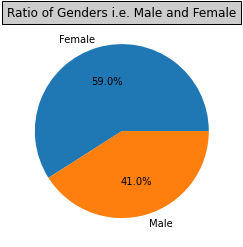

In [41]:
# Pie plot for gender
gender_pie = stroke_df.Gender.value_counts()
plt.pie(gender_pie, labels= gender_pie.index, autopct="%1.1f%%")
# stroke_df.groupby(['Gender']).sum().plot(kind='pie', y='Gender_ratio')

plt.title("Ratio of Genders i.e. Male and Female", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

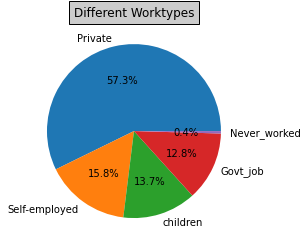

In [42]:
#pie plot for work type
WorkType_pie = stroke_df.Work_Type.value_counts()
plt.pie(WorkType_pie, labels= WorkType_pie.index, autopct="%1.1f%%")
plt.title("Different Worktypes", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

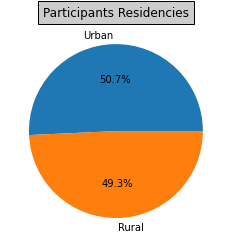

In [43]:
# pie plot for residence type
ResidenceType_pie = stroke_df.Residence_Type.value_counts()
plt.pie(ResidenceType_pie, labels= ResidenceType_pie.index, autopct="%1.1f%%")
plt.title("Participants Residencies", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

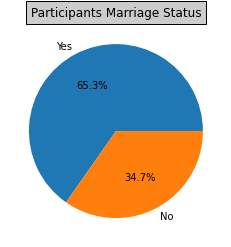

In [44]:
#pie plot for marriage status
EverMarried_pie = stroke_df.Ever_Married.value_counts()
plt.pie(EverMarried_pie, labels= EverMarried_pie.index, autopct="%1.1f%%")
plt.title("Participants Marriage Status", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

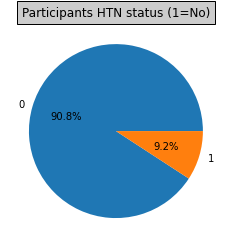

In [45]:
# pie plot for HTN
HTN_pie = stroke_df.Hypertension.value_counts()
plt.pie(HTN_pie, labels= HTN_pie.index, autopct="%1.1f%%")
plt.title("Participants HTN status (1=No)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

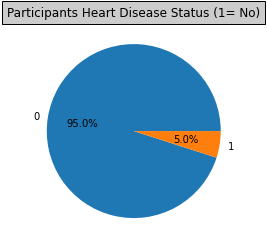

In [46]:
# pie plot for Heart_Disease 
Heart_Disease_pie = stroke_df.Heart_Disease.value_counts()
plt.pie(Heart_Disease_pie, labels= Heart_Disease_pie.index, autopct="%1.1f%%")
plt.title("Participants Heart Disease Status (1= No)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

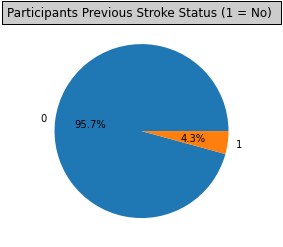

In [47]:
# pie plot for stroke
Stroke_pie = stroke_df.Stroke.value_counts()
plt.pie(Stroke_pie, labels= Stroke_pie.index, autopct="%1.1f%%")
plt.title("Participants Previous Stroke Status (1 = No) ", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

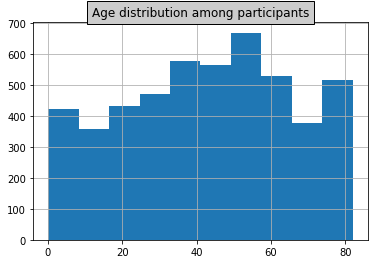

In [49]:
# histogram for age 
stroke_df.hist(column='Age')
plt.title("Age distribution among participants", bbox={'facecolor':'0.8', 'pad':5})
plt.show()



In [ ]:
# Line plot with AGE as X axis and Avg Glucose and BMI in Y axis
# Bar Plot for Average Glucose and BMI (categorize Avg Glucose and BMI in ranges)

In [ ]:
# Histogram for Age
# Categorize BMI to weight range and create a pie plot
# Categorize Glucose to pre-Diabetes, no Diabetes and Diabetes and create a pie plot